## Section 5.5

# Exercise 5.22

In [1]:
#inputs
xi <- 0.05
sigma <- 0.25
K <- 20
yps <- c(0.05,0.25,0.5,0.75,0.95)

#percentiles
exp(K*xi+sqrt(K)*sigma*qnorm(yps))-1

[1] -0.5678585  0.2787685  1.7182818  4.7782592 16.0986970

# Exercies 5.23

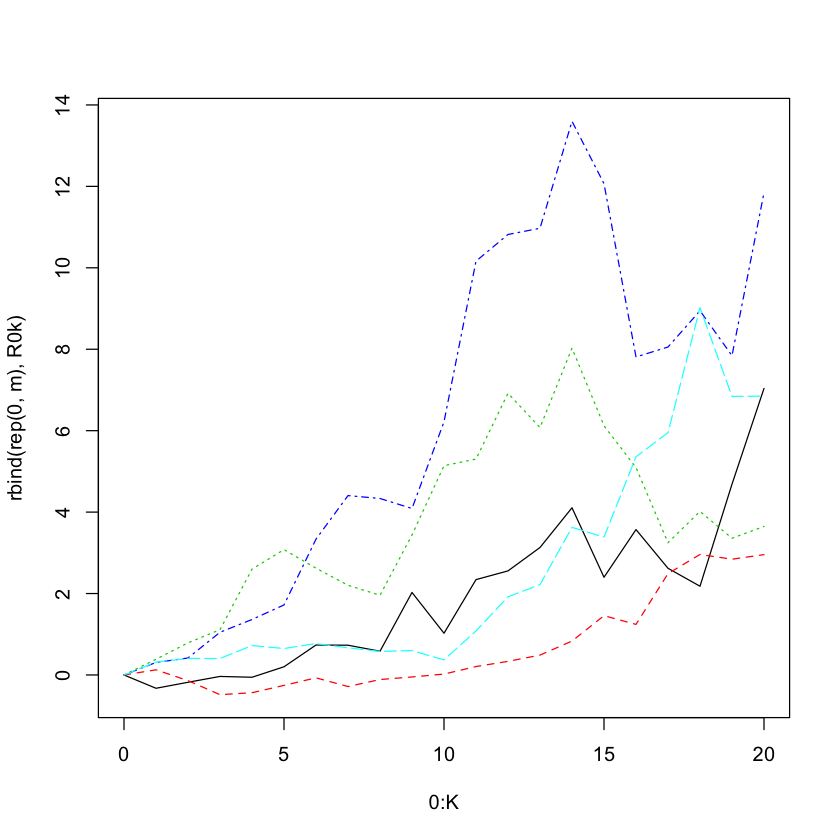

In [3]:
#inputs
xi <- 0.05
sigma <- 0.25
K <- 20
m <- 5
#m<-50

#generate random walk
eta <- matrix(rnorm(m*K),ncol=m)
R0k <- exp(apply(xi+sigma*eta,2,cumsum))-1

#plot
matplot(0:K,rbind(rep(0,m),R0k),type="l")

# Exercise 5.24

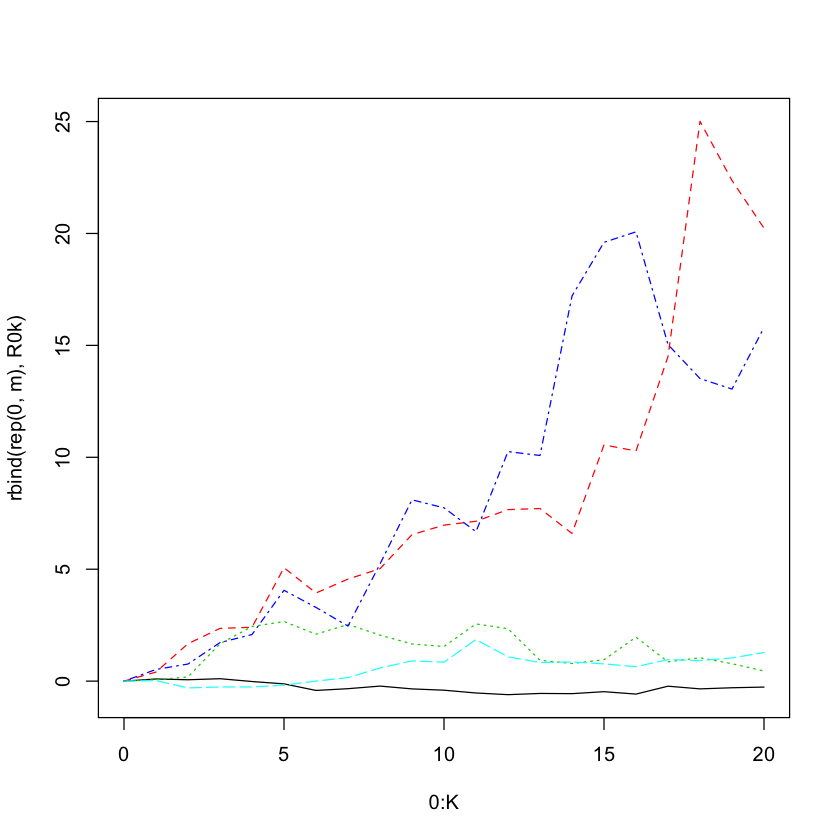

In [4]:
#inputs
xi <- 0.05
sigma <- 0.25
xisigma <- 0.25
alpha <- 5
K <- 20
m <- 5
#m<-50

#simulate RW with stochastic vol
eta <- matrix(rnorm(m*K),ncol=m)
Gk <- matrix(rgamma(m*K,alpha,alpha),ncol=m)
sigmak <- xisigma/sqrt(Gk)
R0k <- exp(apply(xi+sigmak*eta,2,cumsum))-1

#plot
matplot(0:K,rbind(rep(0,m),R0k),type="l")

# Exercise 5.25

In [36]:
#inputs
xi <- 0.05
sigma <- 0.25
xisigma <- 0.25
alpha <- 5
K <- 20
yps <- c(0.05,0.25,0.5,0.75,0.95)

m <- 1e4

#generate RW with stochastic vol
eta <- matrix(rnorm(m*K),ncol=m)
Gk <- matrix(rgamma(m*K,alpha,alpha),ncol=m)
sigmak <- xisigma/sqrt(Gk)
R0K <- exp(apply(xi+sigmak*eta,2,sum))-1

#calc percentiles
sort(R0K)[yps*m]
exp(K*xi+sqrt(K)*sigma*qnorm(yps))-1

[1] -0.6418365  0.1743719  1.7409596  5.4133580 21.6090294

[1] -0.5678585  0.2787685  1.7182818  4.7782592 16.0986970

# Exercise 5.26

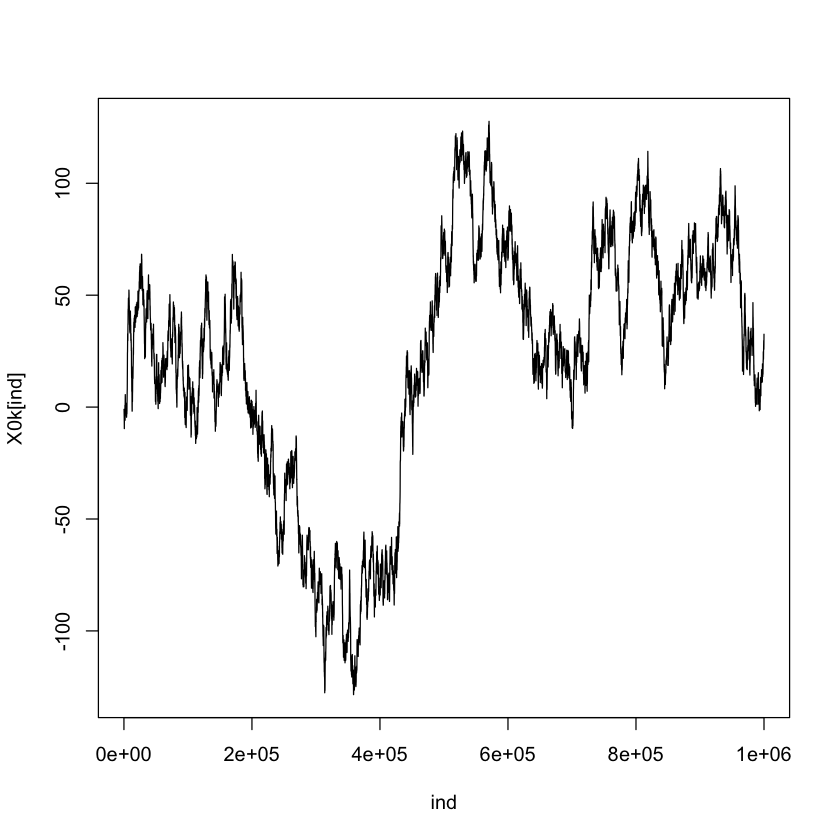

In [43]:
#inputs
sigma <- 0.25
K <- 1e6

#calculate BM
eta <- rnorm(K)
X0k <- sigma*cumsum(eta)
ind <- seq(100,K,100)

#plot
plot(ind,X0k[ind],type="l")

## Section 5.6



# Exercise 5.29

In [7]:
r <- scan("/studier/emner/matnat/math/STK3505/h20/nibornor.txt")

xiHat <- mean(r)
autocor <- acf(r,plot=FALSE)
aHat <- autocor$acf[2]
sigmaHat <- sd(r)*sqrt(1-aHat^2)

c(xiHat,aHat,sigmaHat)

[1] 0.06206316 0.71387898 0.01810603

# Exercise 5.30

In [17]:
#inputs for AR(1)
xi <- 0.062
sigma <- 0.018
a <- 0.71
r0 <- 0.04
K <- 25
m <- 25

#define function
simulate_AR1<-function(x0,a,m,K){
   X <- matrix(x0,K+1,m)
    for(k in 1:K)
     {
       eps <- rnorm(m)
       X[k+1,] <- a*X[k,]+sigma*eps
     } 
    return(X)
}

#compute AR(1)
x0 <- r0-xi
X<-simulate_AR1(x0,a,m,K)
r <- X+xi

#plot
matplot(0:K,r,type="l")

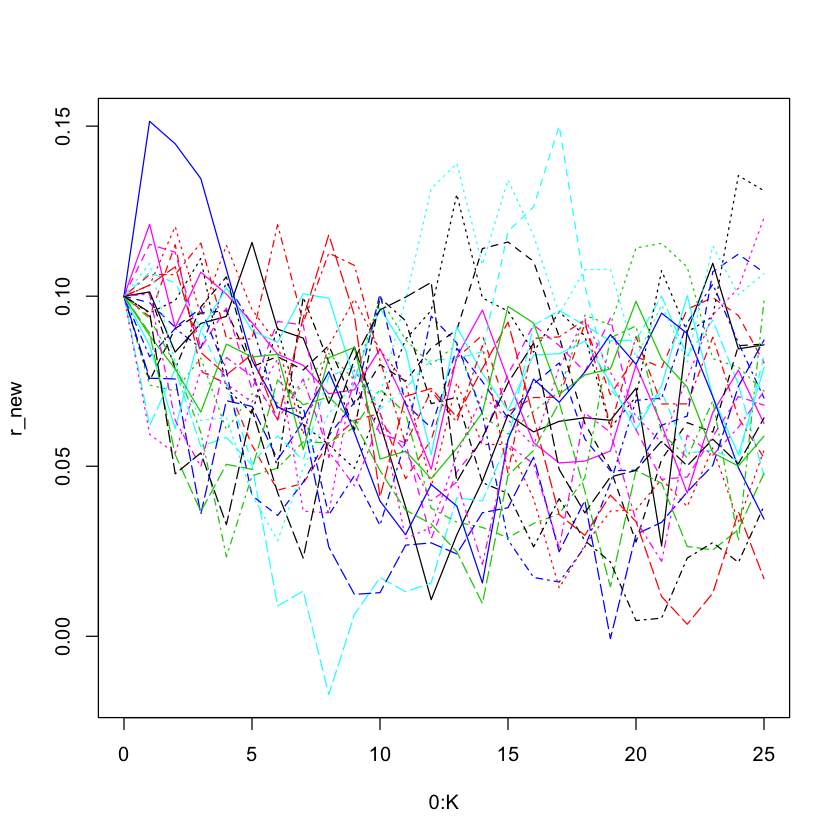

In [18]:
#new initial interest
r0 <- 0.1

#compute AR(1)
x0 <- r0-xi
X<-simulate_AR1(x0,a,m,K)
r_new <- X+xi

#plot
matplot(0:K,r,type="l")
matplot(0:K,r_new,type="l")

# Exercise 5.31

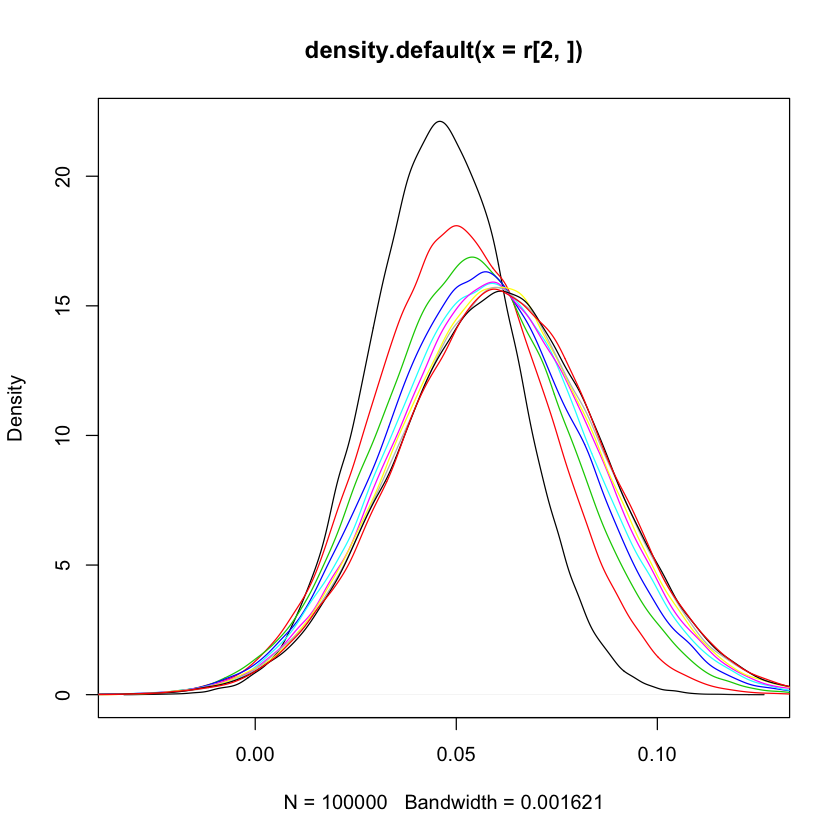

In [19]:
#inputs
xi <- 0.062
sigma <- 0.018
a <- 0.71
r0 <- 0.04
K <- 10
m <- 1e5

#simulate AR(1)
x0 <- r0-xi
X<-simulate_AR1(x0,a,m,K)
r <- X+xi

#plot densities
plot(density(r[2,]))
for(k in 1+2:K)
 {
   lines(density(r[k,]),col=k-1)
 }

In [20]:
#redefine r0
r0 <- 0.1

#simulate AR(1)
x0 <- r0-xi
X<-simulate_AR1(x0,a,m,K)
r <- X+xi

#plot densities
plot(density(r[2,]))
for(k in 1+2:K)
 {
   lines(density(r[k,]),col=k-1)
 }

# Section 3.6

## Exercise 3.30

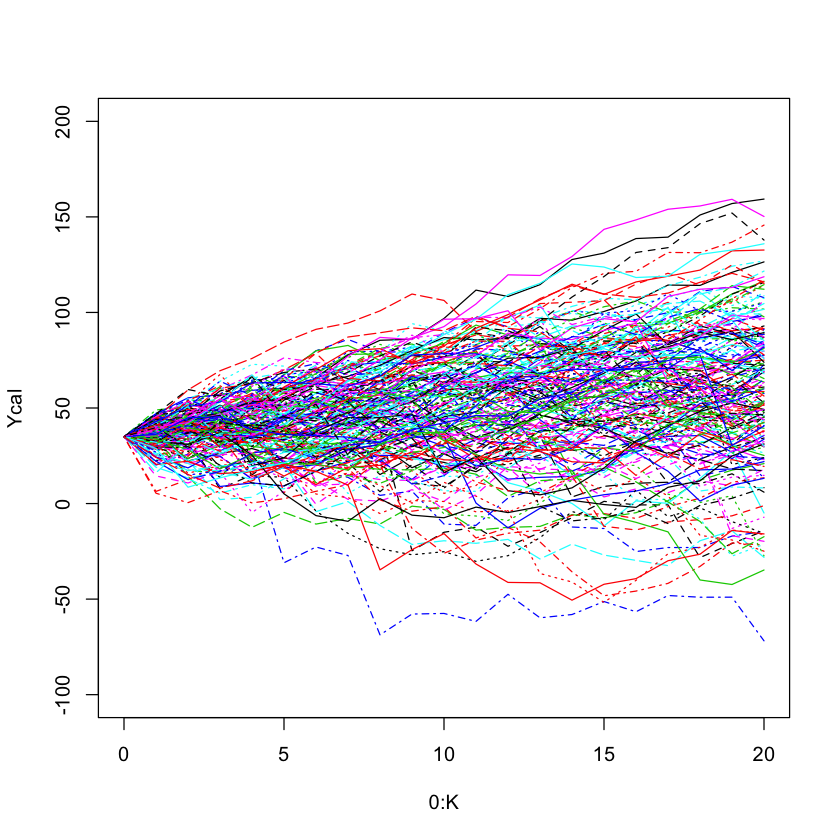

In [48]:
#inputs
lambda <- 10
xi <- 0
sigma <- 1
Pi <- 18
nu0 <- 35
K <- 20
m <- 200

#define function for simulating Compound Poisson
simulate_CP<-function(m,K,lambda,xi,sigma){
    N <- rpois(m*K,lambda)
    Xcal <- rep(0,K*m)
    for(i in 1:(m*K))
      {
        Z <- rlnorm(N[i],xi,sigma)
        Xcal[i] <- sum(Z)
      }
    #segregate compound Poisson into years
    Xcal <- matrix(Xcal,K,m)
    return(Xcal)
}

#simulate compound Poisson
Xcal <-simulate_CP(m,K,lambda,xi,sigma)

#calculate Own Funds
Ycal <- nu0+(1:K)*Pi-apply(Xcal,2,cumsum)
Ycal <- rbind(rep(nu0,m),Ycal)

#plot
matplot(0:K,Ycal,type="l",ylim=c(-100,200))

In [31]:
#change premium
Pi <- 16.4
Ycal <- nu0+(1:K)*Pi-apply(Xcal,2,cumsum)
Ycal <- rbind(rep(nu0,m),Ycal)


matplot(0:K,Ycal,type="l",ylim=c(-100,200))

# Exercise 3.31

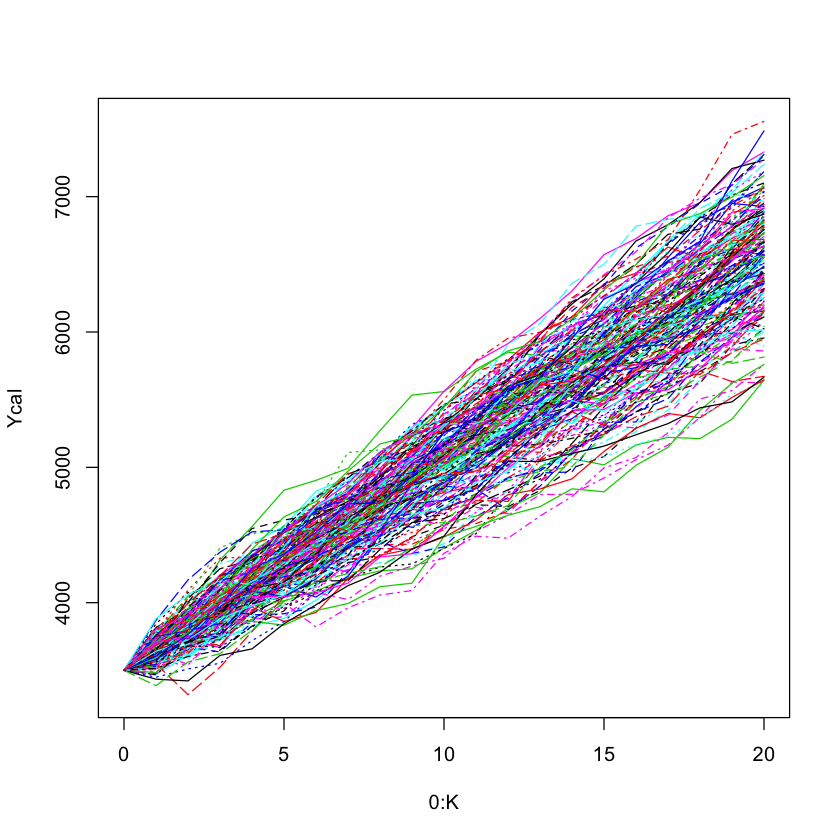

In [46]:
#inputs
lambda <- 1000
xi <- 0
sigma <- 1
Pi <- 1800
nu0 <- 3500
K <- 20
m <- 200


#simulate compound Poisson
Xcal <-simulate_CP(m,K,lambda,xi,sigma)

#calculate Own Funds
Xcal <- matrix(Xcal,K,m)
Ycal <- nu0+(1:K)*Pi-apply(Xcal,2,cumsum)
Ycal <- rbind(rep(nu0,m),Ycal)

matplot(0:K,Ycal,type="l")

# Exercise 3.33

In [35]:
#input
lambda <- 10
xi <- 0
sigma <- 1
Pi <- 18
nu0 <- 0
K <- 20
yps <- c(0.05,0.01)
m <- 1e4

#simulate compound Poisson
Xcal <-simulate_CP(m,K,lambda,xi,sigma)

#calculate Own Funds
Ycal <- nu0+(1:K)*Pi-apply(Xcal,2,cumsum)
Ycal <- rbind(rep(nu0,m),Ycal)
Ymin <- apply(Ycal,2,min)

#find initial capital
nu0yps <- -sort(Ymin)[m*yps]
nu0yps

#reduce K to 10
Ymin <- apply(Ycal[0:10+1,],2,min)
nu0yps <- -sort(Ymin)[m*yps]
nu0yps

#reduce K to 5
Ymin <- apply(Ycal[0:5+1,],2,min)
nu0yps <- -sort(Ymin)[m*yps]
nu0yps

[1] 54.15103 81.77590

[1] 42.89719 64.73165

[1] 31.66900 50.34519